# リッジ回帰

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

$ E(\boldsymbol{\omega}) = \|\boldsymbol{y-\tilde{X}\omega}\|^2 + \lambda \| \omega\|^2$\
$ \boldsymbol{\tilde{y}(\omega) = \tilde{X}\omega}$\
$ \boldsymbol{\omega = (\tilde{X}^T\tilde{X}+\lambda{I})^{-1}\tilde{X}^Ty}$

## 多次元

In [2]:
from solver import LinearRegression
from solver import RidgeRegression
from mpl_toolkits.mplot3d import axes3d

In [3]:
n = 1000
scale = 10

w0, w1, w2 = 1, 2, 3
X = np.random.random((n, 2)) * scale
w = np.array([w1, w2])
y = w0 + np.dot(X, w) + np.random.randn(n)

In [4]:
model_linear = LinearRegression()
model_linear.fit(X, y)
print("係数: ", model_linear.w_)

係数:  [1.05054724 1.99008999 2.9999602 ]


In [5]:
model_ridge = RidgeRegression()
model_ridge.fit(X, y)
print("係数: ", model_ridge.w_)

係数:  [1.04623489 1.99046733 3.00024134]


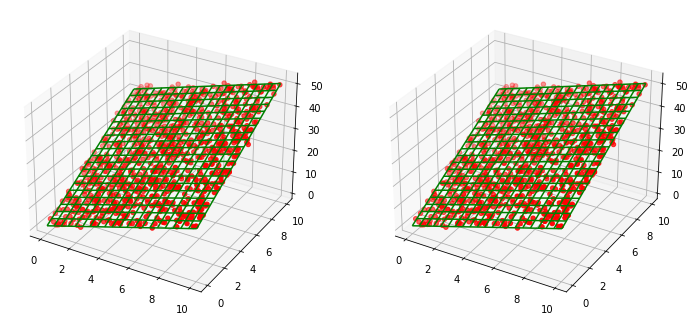

In [6]:
# 21 x 21のメッシュで正解値のプロットを表現
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 21), np.linspace(0, scale, 21))
Xmesh = np.c_[np.ones(xmesh.size), xmesh.ravel(), ymesh.ravel()]
zmesh1 = np.dot(Xmesh, model_linear.w_).reshape(xmesh.shape)
zmesh2 = np.dot(Xmesh, model_ridge.w_).reshape(xmesh.shape)

fig = plt.figure(figsize=(12, 6))

# 線形回帰のプロット
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, color="r")
ax1.plot_wireframe(xmesh, ymesh, zmesh1, color="g")

# 線形回帰のプロット
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, color="r")
ax2.plot_wireframe(xmesh, ymesh, zmesh2, color="g")

plt.show()

In [7]:
X_ = np.c_[np.ones(n), X]

pred_y1 = np.dot(X_, model_linear.w_)
pred_y2 = np.dot(X_, model_ridge.w_)

rmse1 = np.sqrt( ((pred_y1 - y) ** 2).mean() )
rmse2 = np.sqrt( ((pred_y2 - y) ** 2).mean() )

print("RMSE1 : ", rmse1)
print("RMSE2 : ", rmse2)

RMSE1 :  1.0173764149611002
RMSE2 :  1.0173778486286886


## 実践的な例

In [8]:
import os, subprocess
import csv

In [9]:
filename = "winequality-red.csv"
if not os.path.isfile(filename):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print(result)

In [10]:
Xy = []
with open(filename) as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64) # 1行目はヘッダーのため削除

In [11]:
# 訓練データとテストデータの分類
np.random.seed(0)
np.random.shuffle(Xy)

train_x = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_x = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

In [12]:
# 線形回帰で学習と予測
model_linear = LinearRegression()
model_linear.fit(train_x, train_y)
y1 = model_linear.predict(test_x)

In [13]:
# リッジ回帰で学習と予測
model_ridge = RidgeRegression()
model_ridge.fit(train_x, train_y)
y2 = model_ridge.predict(test_x)

In [14]:
rmse1 = np.sqrt( ((y1 - test_y) ** 2).mean() )
rmse2 = np.sqrt( ((y2 - test_y) ** 2).mean() )

print("RMSE1: ", rmse1)
print("RMSE2: ", rmse2)

RMSE1:  0.6724248548470456
RMSE2:  0.68068075961885


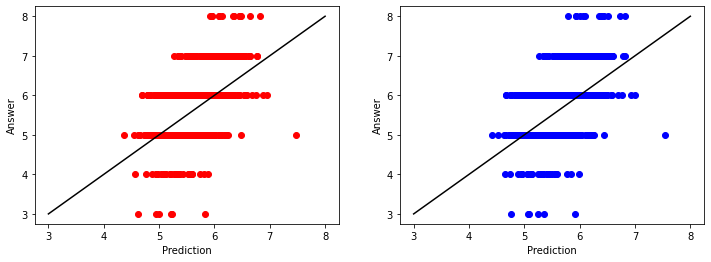

In [15]:
xp = [3, 8]
yp = [3, 8]

fig = plt.figure(figsize=(12, 4))

# 線形回帰のプロット
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y1, test_y, color="r")
ax1.plot(xp ,yp, color="k")
plt.xlabel("Prediction")
plt.ylabel("Answer")

# リッジ回帰のプロット
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(y2, test_y, color="b")
ax2.plot(xp ,yp, color="k")
plt.xlabel("Prediction")
plt.ylabel("Answer")

plt.show()

## 1次元

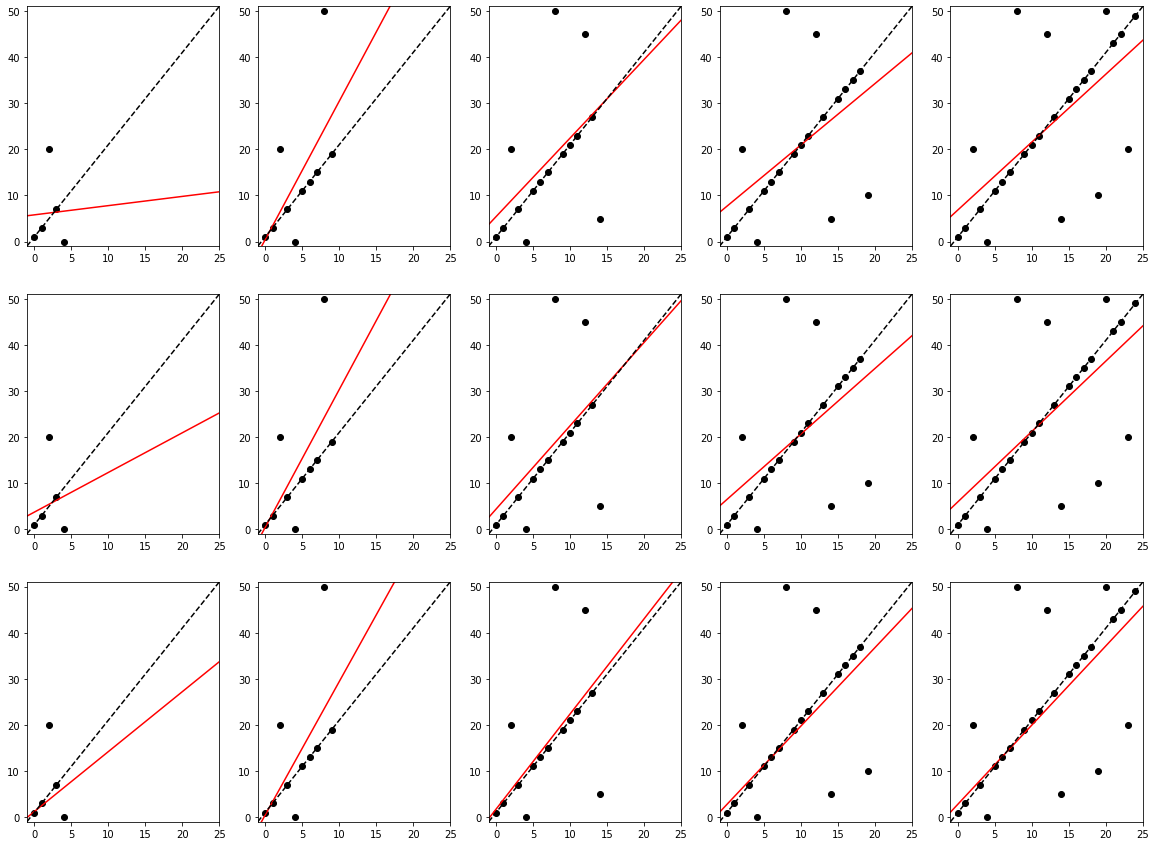

In [16]:
# 25点のうち8点を大きく外れた値にする
x = np.arange(25)
y = 1 + 2 * x
y[2] = 20
y[4] = 0
y[8] = 50
y[12] = 45
y[14] = 5
y[19] = 10
y[20] = 50
y[23] = 20

xmin, xmax = x.min()-1, x.max()+1
ymin, ymax = y.min()-1, y.max()+1

cols = 5
fig = plt.figure(figsize=(20, 15))
axes = fig.subplots(3, cols)

for i in range(cols):
    
    ax1 = axes[0, i]
    ax2 = axes[1, i]
    ax3 = axes[2, i]
    
    # 最大値・最小値の設定
    ax1.set_xlim([xmin, xmax])
    ax1.set_ylim([ymin, ymax])    
    ax2.set_xlim([xmin, xmax])
    ax2.set_ylim([ymin, ymax])    
    ax3.set_xlim([xmin, xmax])
    ax3.set_ylim([ymin, ymax])    
    
    # iが大きくなるにつれてピックアップする点を増やす
    xx = x[:  (i + 1) * 5]
    yy = y[: (i + 1) * 5]
    ax1.scatter(xx, yy, color="k")
    ax2.scatter(xx, yy, color="k")
    ax3.scatter(xx, yy, color="k")
    
    xs = np.array([xmin, xmax]).reshape(-1, 1)
    ys = np.array([ymin, ymax]).reshape(-1, 1)
    
    # 線形回帰
    model_linear = LinearRegression()
    model_linear.fit(xx, yy)
    ys1 = model_linear.predict(xs)
    ax1.plot(xs, ys1, color="r")
    ax1.plot(xs, ys, color="k", linestyle="--")
    
    # リッジ回帰 λ=1
    model_ridge1 = RidgeRegression(1.)
    model_ridge1.fit(xx, yy)
    ys2 = model_ridge1.predict(xs)
    ax2.plot(xs, ys2, color="r")
    ax2.plot(xs, ys, color="k", linestyle="--")

    # リッジ回帰 λ=10
    model_ridge2 = RidgeRegression(10.)
    model_ridge2.fit(xx, yy)
    ys3 = model_ridge2.predict(xs)
    ax3.plot(xs, ys3, color="r")
    ax3.plot(xs, ys, color="k", linestyle="--")
    